In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import time

In [2]:
sigma_u = 1
vp = 5
sigma_p = 1
epoch = 5000
dt = 0.01

vs = [np.random.normal(6, np.sqrt(2)) for i in range(epoch)]
vps = []
sigma_ps = []
sigma_us = []
eps_1 = []
eps_2 = []
eus = []

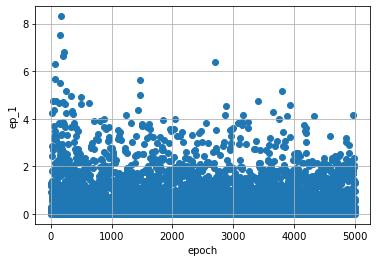

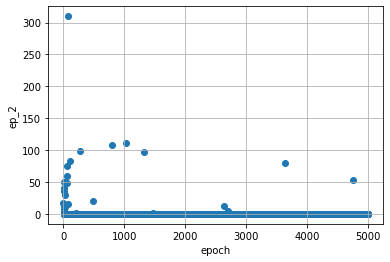

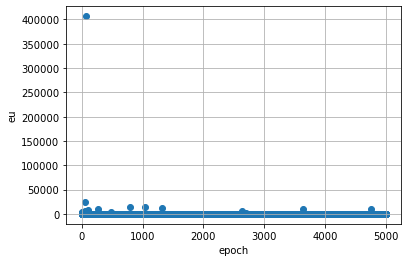

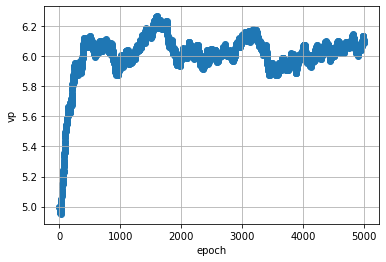

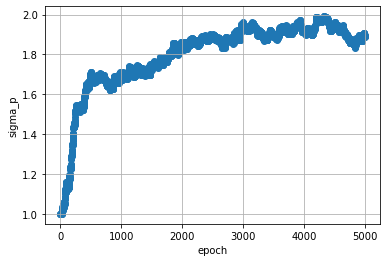

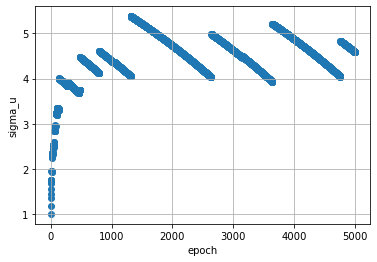

In [3]:
for i in range(epoch):
    v = vs[i]
    u = v * v
    infer_time = 5000
    end = False
    phi = vp
    phi_pre = phi
    phi_pre_2 = phi
    ep = 0
    ep_pre = ep
    ep_pre_2 = ep
    eu = 0
    eu_pre = ep
    eu_pre_2 = eu 
    
    # 推測
    for j in range(1, infer_time):
        phi_pre_3 = phi_pre_2
        phi_pre_2 = phi_pre
        phi_pre = phi
        ep_pre_3 = ep_pre_2
        ep_pre_2 = ep_pre
        ep_pre = ep
        eu_pre_3 = eu_pre_2
        eu_pre_2 = eu_pre
        eu_pre = eu
        phi = phi_pre + dt * (-ep_pre + eu_pre * (2 * phi_pre))
        ep = ep_pre + dt * (phi_pre - vp - sigma_p * ep_pre)
        eu = eu_pre + dt * (u - phi_pre**2 - sigma_u * eu_pre)
        
        if j > 3:
            blur = (phi - phi_pre)**2 + (phi_pre - phi_pre_2)**2 + (phi_pre_2 - phi_pre_3)**2
            if blur < 1e-8:
                end = True
            
        if end:
            infer_time = j + 1
            break
    
    eps_1.append(ep * ep)
    eps_2.append((phi - v) ** 2)
    eus.append((phi**2 - u) ** 2)
    vps.append(vp)
    sigma_ps.append(sigma_p)
    sigma_us.append(sigma_u)
          
    # 注意
    vp = vp + ep * dt
    sigma_p = max(sigma_p + 1/2 * (ep ** 2 - 1/sigma_p) * dt, 1)
    sigma_u = max(sigma_u + 1/2 * (eu ** 2 - 1/sigma_u) * dt, 1) 
    
plt.scatter(range(epoch), eps_1)
plt.xlabel("epoch")
plt.ylabel("ep_1")
plt.plot()
plt.grid()
plt.show()

plt.scatter(range(epoch), eps_2)
plt.xlabel("epoch")
plt.ylabel("ep_2")
plt.plot()
plt.grid()
plt.show()

plt.scatter(range(epoch), eus)
plt.xlabel("epoch")
plt.ylabel("eu")
plt.plot()
plt.grid()
plt.show()

plt.scatter(range(epoch), vps)
plt.xlabel("epoch")
plt.ylabel("vp")
plt.plot()
plt.grid()
plt.show()

plt.scatter(range(epoch), sigma_ps)
plt.xlabel("epoch")
plt.ylabel("sigma_p")
plt.plot()
plt.grid()
plt.show()

plt.scatter(range(epoch), sigma_us)
plt.xlabel("epoch")
plt.ylabel("sigma_u")
plt.plot()
plt.grid()
plt.show()

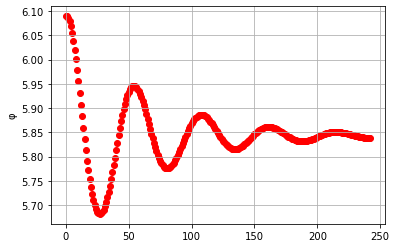

v: 5.839134847535669
vp: 6.089230948689753
sigma_p: 1.8992956678612531
sigma_u: 4.584693853758645
phi: 5.838653828375531
u: 34.0954957677054
g(phi): 34.08987852760424


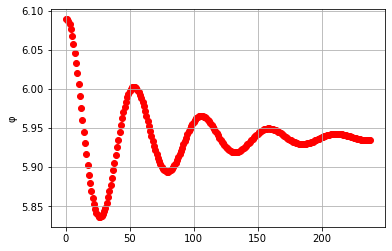

v: 5.9348598444072085
vp: 6.089230948689753
sigma_p: 1.8992956678612531
sigma_u: 4.584693853758645
phi: 5.934069615580968
u: 35.222561372757156
g(phi): 35.21318220256125


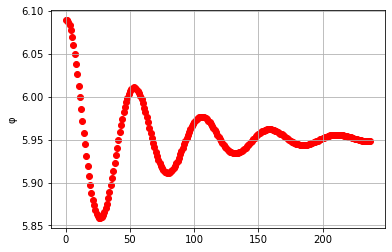

v: 5.948705106551627
vp: 6.089230948689753
sigma_p: 1.8992956678612531
sigma_u: 4.584693853758645
phi: 5.947898603279118
u: 35.38709244471341
g(phi): 35.37749779488968


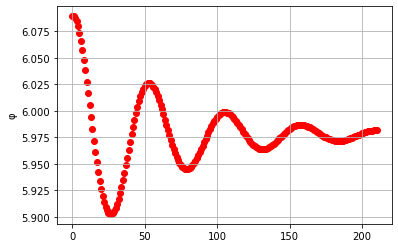

v: 5.975785382534413
vp: 6.089230948689753
sigma_p: 1.8992956678612531
sigma_u: 4.584693853758645
phi: 5.981631366286635
u: 35.710010938111964
g(phi): 35.779913802144115


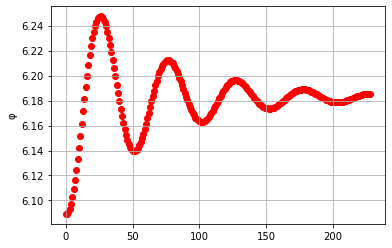

v: 6.1841580033600625
vp: 6.089230948689753
sigma_p: 1.8992956678612531
sigma_u: 4.584693853758645
phi: 6.185556921870342
u: 38.24381021052231
g(phi): 38.2611144336981


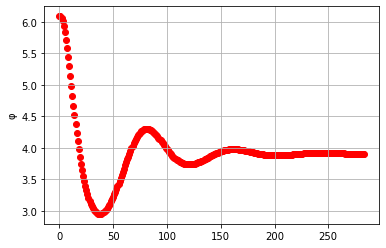

v: 3.824349569405688
vp: 6.089230948689753
sigma_p: 1.8992956678612531
sigma_u: 4.584693853758645
phi: 3.905796747597204
u: 14.625649629013472
g(phi): 15.255248233540899


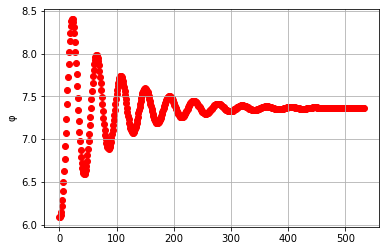

v: 7.379116648192908
vp: 6.089230948689753
sigma_p: 1.8992956678612531
sigma_u: 4.584693853758645
phi: 7.367526097079196
u: 54.45136250763774
g(phi): 54.28044079114301


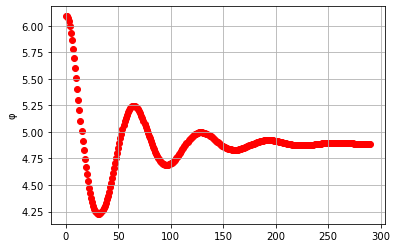

v: 4.859787669299886
vp: 6.089230948689753
sigma_p: 1.8992956678612531
sigma_u: 4.584693853758645
phi: 4.884986777447288
u: 23.617536190679214
g(phi): 23.863095815834843


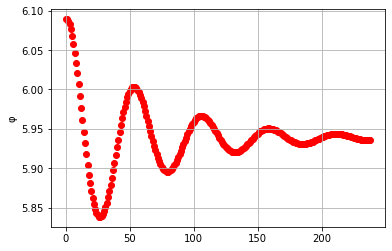

v: 5.936017366837507
vp: 6.089230948689753
sigma_p: 1.8992956678612531
sigma_u: 4.584693853758645
phi: 5.935229766328682
u: 35.23630217939649
g(phi): 35.22695237911402


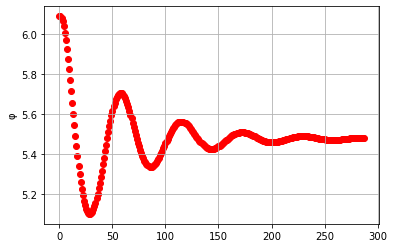

v: 5.467099212587866
vp: 6.089230948689753
sigma_p: 1.8992956678612531
sigma_u: 4.584693853758645
phi: 5.483627673713696
u: 29.88917380027886
g(phi): 30.070172463918677


In [4]:
test_number = 10

for i in range(test_number):
    v = vs[i]
    u = v * v
    infer_time = 1000
    end = False
    phi = vp
    phi_pre = phi
    phi_pre_2 = phi
    ep = 0
    ep_pre = ep
    ep_pre_2 = ep
    eu = 0
    eu_pre = ep
    eu_pre_2 = eu 
    PHIs_1 = []
    PHIs_1.append(phi)
    
    # 推測
    for j in range(1, infer_time):
        phi_pre_3 = phi_pre_2
        phi_pre_2 = phi_pre
        phi_pre = phi
        ep_pre_3 = ep_pre_2
        ep_pre_2 = ep_pre
        ep_pre = ep
        eu_pre_3 = eu_pre_2
        eu_pre_2 = eu_pre
        eu_pre = eu
        phi = phi_pre + dt * (-ep_pre + eu_pre * (2 * phi_pre))
        ep = ep_pre + dt * (phi_pre - vp - sigma_p * ep_pre)
        eu = eu_pre + dt * (u - phi_pre**2 - sigma_u * eu_pre)
        
        if j > 3:
            blur = (phi - phi_pre)**2 + (phi_pre - phi_pre_2)**2 + (phi_pre_2 - phi_pre_3)**2
            if blur < 1e-8:
                end = True
            
        if end:
            infer_time = j
            break
            
        PHIs_1.append(phi)
            
    plt.scatter(range(infer_time), PHIs_1, color="r")
    plt.xlabel("")
    plt.ylabel("φ")
    plt.plot()
    plt.grid()
    plt.show()
    
    print("v:", v)
    print("vp:", vp)
    print("sigma_p:", sigma_p)
    print("sigma_u:", sigma_u)
    print("phi:", phi)
    print("u:", u)
    print("g(phi):", phi*phi)

In [5]:
sample_number = 200
us = [np.random.normal(7, np.sqrt(3)) ** 2 for i in range(sample_number)]
PHIs_2 = []

In [6]:
for u in us:
    infer_time = 100
    end = False
    phi = list(range(infer_time))
    ep = list(range(infer_time))
    eu = list(range(infer_time))
    phi[0] = vp
    ep[0] = 0
    eu[0] = 0
    
    # 推測
    for j in range(1, infer_time):
        _phi = np.array([phi[j-1]])
        _phi = np.insert(_phi, 0, 1)
        _phi = torch.from_numpy(_phi.astype(np.float32)).float()
        features = extractor(_phi)
        H = features["sigmoid"]
        H = H.cpu().detach().numpy().copy()
        sigmoid_dash = H * (1 - H)
        U = test(net, _phi)
        U_dash = np.dot(sigmoid_dash * W1, W2)
        U_dash = U_dash[1, 0]
        phi[j] = phi[j-1] + dt * (-ep[j-1] + eu[j-1] * U_dash)
        ep[j] = ep[j-1] + dt * (phi[j-1] - vp - sigma_p * ep[j-1])
        eu[j] = eu[j-1] + dt * (u - U - sigma_u * eu[j-1])
        
        if j > 3:
            blur = (phi[j] - phi[j-1])**2 + (phi[j-1] - phi[j-2])**2 + (phi[j-2] - phi[j-3])**2
            if blur < 1e-6:
                end = True
            
        
        if end:
            infer_time = j
            break
    
    PHIs_2.append(phi[infer_time - 1])

NameError: name 'extractor' is not defined

In [ ]:
fig1 = plt.figure()
plt.scatter(us, PHIs_2, color="r")
x = np.arange(120)
plt.plot(x, np.sqrt(x))
plt.xlabel("u")
plt.ylabel("φ")
plt.plot()
plt.grid()
# fig1.savefig("before.png")
plt.show()